In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
import seaborn as sns
sns.set_style("whitegrid")

from sklearn.linear_model import LogisticRegression, LinearRegression, Lasso, Ridge
from sklearn.ensemble import GradientBoostingClassifier, GradientBoostingRegressor
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import accuracy_score, mean_squared_error
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [85]:
# #### Allows for scrolling through data
pd.set_option("display.max_rows", None)

In [3]:
kills = pd.read_csv("../data/vct_2023/matches/kills.csv")
all_kills = kills.loc[kills['Kill Type'] == 'All Kills']
all_kills_all_maps = kills.loc[(kills['Kill Type'] == 'All Kills') & (kills['Map'] == 'All Maps')]
all_kills_all_maps.reset_index(drop = True, inplace = True)
all_kills_all_maps.head()

,Tournament,Stage,Match Type,Match Name,Map,Player Team,Player,Enemy Team,Enemy,Player Kills,Enemy Kills,Difference,Kill Type
0,Valorant Champions 2023,Group Stage,Opening (D),Team Liquid vs Natus Vincere,All Maps,Team Liquid,Jamppi,Natus Vincere,ANGE1,9.0,12.0,-3.0,All Kills
1,Valorant Champions 2023,Group Stage,Opening (D),Team Liquid vs Natus Vincere,All Maps,Team Liquid,Jamppi,Natus Vincere,SUYGETSU,6.0,10.0,-4.0,All Kills
2,Valorant Champions 2023,Group Stage,Opening (D),Team Liquid vs Natus Vincere,All Maps,Team Liquid,Jamppi,Natus Vincere,Zyppan,8.0,7.0,1.0,All Kills
3,Valorant Champions 2023,Group Stage,Opening (D),Team Liquid vs Natus Vincere,All Maps,Team Liquid,Jamppi,Natus Vincere,cNed,7.0,5.0,2.0,All Kills
4,Valorant Champions 2023,Group Stage,Opening (D),Team Liquid vs Natus Vincere,All Maps,Team Liquid,Jamppi,Natus Vincere,Shao,8.0,4.0,4.0,All Kills


In [4]:
scores = pd.read_csv("../data/vct_2023/matches/scores.csv")
scores.head()

,Tournament,Stage,Match Type,Match Name,Team A,Team B,Team A Score,Team B Score,Match Result
0,Valorant Champions 2023,Group Stage,Opening (D),Team Liquid vs Natus Vincere,Team Liquid,Natus Vincere,0,2,Natus Vincere won
1,Valorant Champions 2023,Group Stage,Opening (D),DRX vs LOUD,DRX,LOUD,2,1,DRX won
2,Valorant Champions 2023,Group Stage,Opening (B),FUT Esports vs T1,FUT Esports,T1,2,0,FUT Esports won
3,Valorant Champions 2023,Group Stage,Opening (B),Evil Geniuses vs FunPlus Phoenix,Evil Geniuses,FunPlus Phoenix,2,0,Evil Geniuses won
4,Valorant Champions 2023,Group Stage,Winner's (D),Natus Vincere vs DRX,Natus Vincere,DRX,1,2,DRX won


In [5]:
# match_indices = [i for i in range(len(scores['Match Name'])) if i not in [j for j in range(93,111)] and i not in [290]]
# scores_new = scores.iloc[match_indices]

In [6]:
# scores_new.reset_index(drop=True, inplace=True)
# scores_new.head()

In [7]:
# def removeWon(s):
#     return s[:-4]

# new_results_column = scores_new['Match Result'].apply(removeWon)
# scores_new.loc[:,'Match Result'] = new_results_column

In [8]:
# team_a_won = (scores_new['Match Result'] == scores_new['Team A'])
# team_a_won = team_a_won.apply(int)

In [9]:
# all_kills_all_maps['Won'] = np.repeat(list(team_a_won),25)

In [10]:
# all_kills_all_maps.head()

Doing this with merge instead.

In [11]:
left = all_kills_all_maps
right = scores[["Tournament", "Stage", "Match Type", "Match Name", "Match Result"]]
keys = ['Tournament', 'Stage', 'Match Type', 'Match Name']
kills_vs_outcome = left.merge(right, left_on=keys, right_on=keys)
kills_vs_outcome['KDR'] = kills_vs_outcome['Player Kills']/kills_vs_outcome['Enemy Kills']
kills_vs_outcome.head() 

,Tournament,Stage,Match Type,Match Name,Map,Player Team,Player,Enemy Team,Enemy,Player Kills,Enemy Kills,Difference,Kill Type,Match Result,KDR
0,Valorant Champions 2023,Group Stage,Opening (D),Team Liquid vs Natus Vincere,All Maps,Team Liquid,Jamppi,Natus Vincere,ANGE1,9.0,12.0,-3.0,All Kills,Natus Vincere won,0.750000
1,Valorant Champions 2023,Group Stage,Opening (D),Team Liquid vs Natus Vincere,All Maps,Team Liquid,Jamppi,Natus Vincere,SUYGETSU,6.0,10.0,-4.0,All Kills,Natus Vincere won,0.600000
2,Valorant Champions 2023,Group Stage,Opening (D),Team Liquid vs Natus Vincere,All Maps,Team Liquid,Jamppi,Natus Vincere,Zyppan,8.0,7.0,1.0,All Kills,Natus Vincere won,1.142857
3,Valorant Champions 2023,Group Stage,Opening (D),Team Liquid vs Natus Vincere,All Maps,Team Liquid,Jamppi,Natus Vincere,cNed,7.0,5.0,2.0,All Kills,Natus Vincere won,1.400000
4,Valorant Champions 2023,Group Stage,Opening (D),Team Liquid vs Natus Vincere,All Maps,Team Liquid,Jamppi,Natus Vincere,Shao,8.0,4.0,4.0,All Kills,Natus Vincere won,2.000000


In [12]:
def removeWon(s):
    return s[:-4]
kills_vs_outcome['Won'] = (kills_vs_outcome['Player Team'] == kills_vs_outcome['Match Result'].apply(removeWon)).apply(lambda x: 'Won' if x else 'Lost')

In [13]:
kills_vs_outcome

,Tournament,Stage,Match Type,Match Name,Map,Player Team,Player,Enemy Team,Enemy,Player Kills,Enemy Kills,Difference,Kill Type,Match Result,KDR,Won
0,Valorant Champions 2023,Group Stage,Opening (D),Team Liquid vs Natus Vincere,All Maps,Team Liquid,Jamppi,Natus Vincere,ANGE1,9.0,12.0,-3.0,All Kills,Natus Vincere won,0.750000,Lost
1,Valorant Champions 2023,Group Stage,Opening (D),Team Liquid vs Natus Vincere,All Maps,Team Liquid,Jamppi,Natus Vincere,SUYGETSU,6.0,10.0,-4.0,All Kills,Natus Vincere won,0.600000,Lost
2,Valorant Champions 2023,Group Stage,Opening (D),Team Liquid vs Natus Vincere,All Maps,Team Liquid,Jamppi,Natus Vincere,Zyppan,8.0,7.0,1.0,All Kills,Natus Vincere won,1.142857,Lost
3,Valorant Champions 2023,Group Stage,Opening (D),Team Liquid vs Natus Vincere,All Maps,Team Liquid,Jamppi,Natus Vincere,cNed,7.0,5.0,2.0,All Kills,Natus Vincere won,1.400000,Lost
4,Valorant Champions 2023,Group Stage,Opening (D),Team Liquid vs Natus Vincere,All Maps,Team Liquid,Jamppi,Natus Vincere,Shao,8.0,4.0,4.0,All Kills,Natus Vincere won,2.000000,Lost
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7795,Champions Tour 2023: Lock-In Sao Paulo,Playoffs,Grand Final,LOUD vs FNATIC,All Maps,LOUD,tuyz,FNATIC,Derke,12.0,18.0,-6.0,All Kills,FNATIC won,0.666667,Lost
7796,Champions Tour 2023: Lock-In Sao Paulo,Playoffs,Grand Final,LOUD vs FNATIC,All Maps,LOUD,tuyz,FNATIC,Boaster,15.0,14.0,1.0,All Kills,FNATIC won,1.071429,Lost
7797,Champions Tour 2023: Lock-In Sao Paulo,Playoffs,Grand Final,LOUD vs FNATIC,All Maps,LOUD,tuyz,FNATIC,Alfajer,10.0,14.0,-4.0,All Kills,FNATIC won,0.714286,Lost
7798,Champions Tour 2023: Lock-In Sao Paulo,Playoffs,Grand Final,LOUD vs FNATIC,All Maps,LOUD,tuyz,FNATIC,Leo,12.0,19.0,-7.0,All Kills,FNATIC won,0.631579,Lost


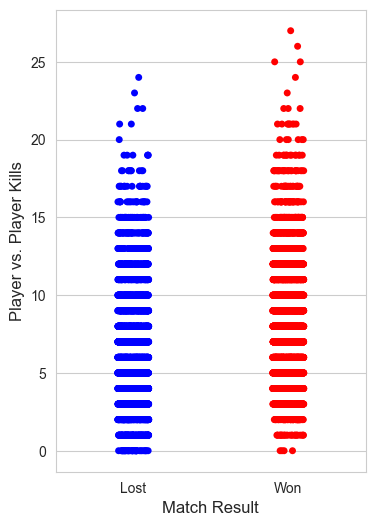

In [14]:
plt.figure(figsize=(4,6))

sns.stripplot(data=kills_vs_outcome,
               x = 'Won',
               y = 'Player Kills',
            hue='Won',
            palette=['blue', 'red'],
            legend=False)

plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.xlabel("Match Result", fontsize=12)
plt.ylabel("Player vs. Player Kills", fontsize=12)

plt.show()

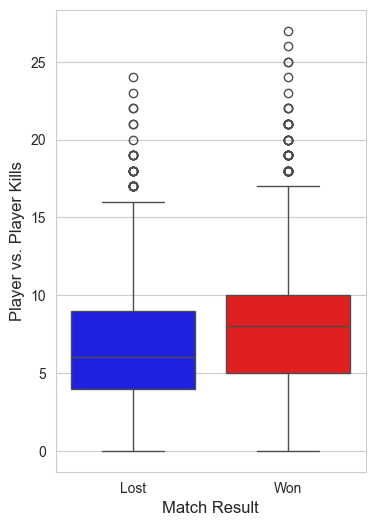

In [15]:
plt.figure(figsize=(4,6))

sns.boxplot(data=kills_vs_outcome,
               x = 'Won',
               y = 'Player Kills',
            hue='Won',
            palette=['blue', 'red'],
            legend=False)

plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.xlabel("Match Result", fontsize=12)
plt.ylabel("Player vs. Player Kills", fontsize=12)

plt.show()

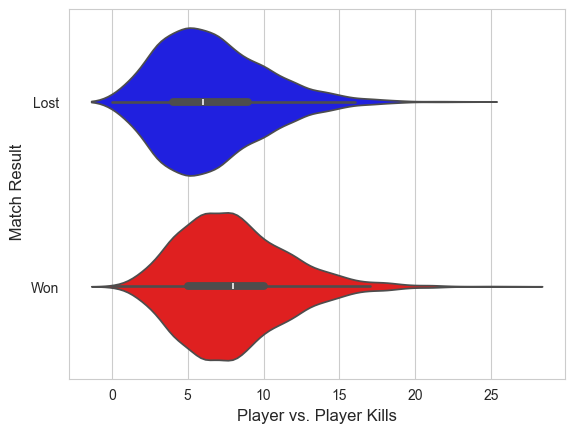

In [16]:
plt.figure()

sns.violinplot(data=kills_vs_outcome,
               y = 'Won',
               x = 'Player Kills',
            hue='Won',
            palette=['blue', 'red'],
            legend=False)


plt.xlabel("Player vs. Player Kills", fontsize=12)
plt.ylabel(" Match Result", fontsize=12)

plt.show()

Kill differences on 1v1 basis.

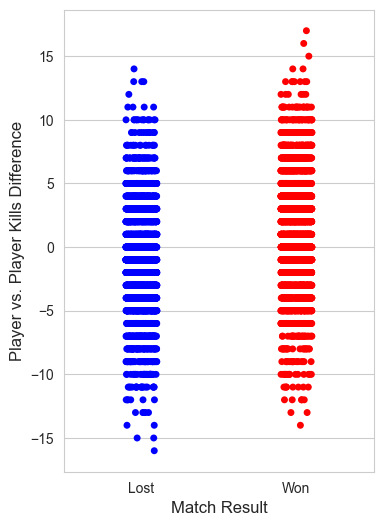

In [17]:
plt.figure(figsize=(4,6))

sns.stripplot(data=kills_vs_outcome,
               x = 'Won',
               y = 'Difference',
            hue='Won',
            palette=['blue', 'red'],
            legend=False)

plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.xlabel("Match Result", fontsize=12)
plt.ylabel("Player vs. Player Kills Difference", fontsize=12)

plt.show()


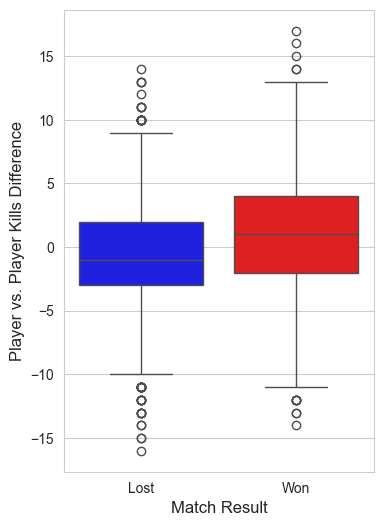

In [18]:
plt.figure(figsize=(4,6))

sns.boxplot(data=kills_vs_outcome,
               x = 'Won',
               y = 'Difference',
            hue='Won',
            palette=['blue', 'red'],
            legend=False)

plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.xlabel("Match Result", fontsize=12)
plt.ylabel("Player vs. Player Kills Difference", fontsize=12)

plt.show()

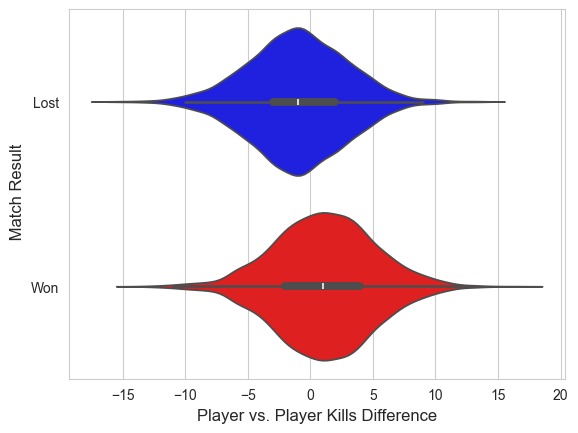

In [19]:
plt.figure()

sns.violinplot(data=kills_vs_outcome,
               y = 'Won',
               x = 'Difference',
            hue='Won',
            palette=['blue', 'red'],
            legend=False)


plt.xlabel("Player vs. Player Kills Difference", fontsize=12)
plt.ylabel(" Match Result", fontsize=12)

plt.show()

1v1 KDR and Match outcomes

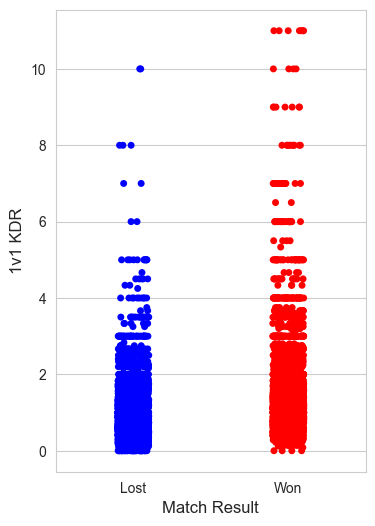

In [20]:
plt.figure(figsize=(4,6))

sns.stripplot(data=kills_vs_outcome,
               x = 'Won',
               y = 'KDR',
            hue='Won',
            palette=['blue', 'red'],
            legend=False)

plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.xlabel("Match Result", fontsize=12)
plt.ylabel("1v1 KDR", fontsize=12)

plt.show()

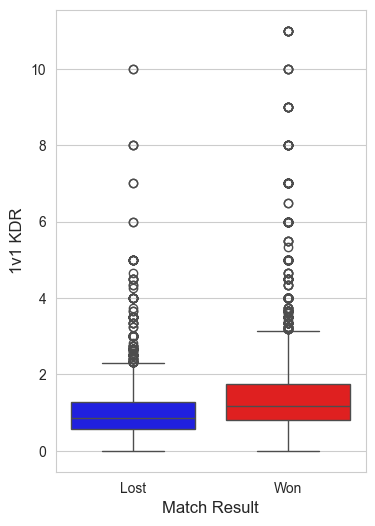

In [21]:
plt.figure(figsize=(4,6))

sns.boxplot(data=kills_vs_outcome,
               x = 'Won',
               y = 'KDR',
            hue='Won',
            palette=['blue', 'red'],
            legend=False)

plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.xlabel("Match Result", fontsize=12)
plt.ylabel("1v1 KDR", fontsize=12)

plt.show()

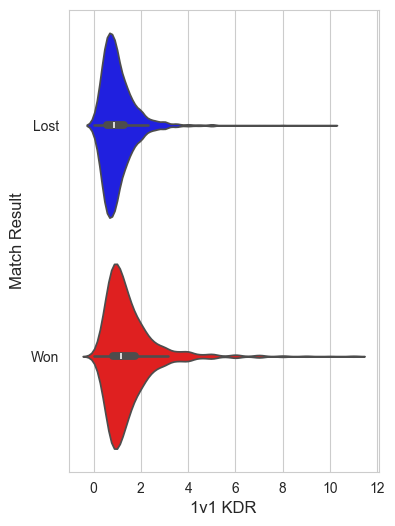

In [22]:
plt.figure(figsize=(4,6))

sns.violinplot(data=kills_vs_outcome,
               y = 'Won',
               x = 'KDR',
            hue='Won',
            palette=['blue', 'red'],
            legend=False)

plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.ylabel("Match Result", fontsize=12)
plt.xlabel("1v1 KDR", fontsize=12)

plt.show()

In [23]:
all_kills_by_map = all_kills.loc[all_kills["Map"] != "All Maps"]
all_kills_by_map.reset_index(drop = True, inplace = True)
all_kills_by_map.head(1000)

,Tournament,Stage,Match Type,Match Name,Map,Player Team,Player,Enemy Team,Enemy,Player Kills,Enemy Kills,Difference,Kill Type
0,Valorant Champions 2023,Group Stage,Opening (D),Team Liquid vs Natus Vincere,Fracture,Team Liquid,Jamppi,Natus Vincere,ANGE1,4.0,8.0,-4.0,All Kills
1,Valorant Champions 2023,Group Stage,Opening (D),Team Liquid vs Natus Vincere,Fracture,Team Liquid,Jamppi,Natus Vincere,SUYGETSU,1.0,4.0,-3.0,All Kills
2,Valorant Champions 2023,Group Stage,Opening (D),Team Liquid vs Natus Vincere,Fracture,Team Liquid,Jamppi,Natus Vincere,Zyppan,4.0,2.0,2.0,All Kills
3,Valorant Champions 2023,Group Stage,Opening (D),Team Liquid vs Natus Vincere,Fracture,Team Liquid,Jamppi,Natus Vincere,cNed,3.0,1.0,2.0,All Kills
4,Valorant Champions 2023,Group Stage,Opening (D),Team Liquid vs Natus Vincere,Fracture,Team Liquid,Jamppi,Natus Vincere,Shao,4.0,2.0,2.0,All Kills
...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,Valorant Champions 2023,Group Stage,Decider (A),EDward Gaming vs Giants Gaming,Split,EDward Gaming,nobody,Giants Gaming,hoody,4.0,5.0,-1.0,All Kills
996,Valorant Champions 2023,Group Stage,Decider (A),EDward Gaming vs Giants Gaming,Split,EDward Gaming,nobody,Giants Gaming,Fit1nho,3.0,1.0,2.0,All Kills
997,Valorant Champions 2023,Group Stage,Decider (A),EDward Gaming vs Giants Gaming,Split,EDward Gaming,nobody,Giants Gaming,Cloud,4.0,5.0,-1.0,All Kills
998,Valorant Champions 2023,Group Stage,Decider (A),EDward Gaming vs Giants Gaming,Split,EDward Gaming,nobody,Giants Gaming,rhyme,3.0,0.0,3.0,All Kills


In [24]:
maps_scores = pd.read_csv("../data/vct_2023/matches/maps_scores.csv")

In [25]:
maps_scores["Match Result"] = np.where(maps_scores["Team A Score"] > maps_scores["Team B Score"], maps_scores["Team A"], maps_scores["Team B"])
maps_scores.head()

,Tournament,Stage,Match Type,Match Name,Map,Team A,Team A Score,Team A Attacker Score,Team A Defender Score,Team A Overtime Score,Team B,Team B Score,Team B Attacker Score,Team B Defender Score,Team B Overtime Score,Duration,Match Result
0,Valorant Champions 2023,Group Stage,Opening (D),Team Liquid vs Natus Vincere,Fracture,Team Liquid,11,6,5,NaN,Natus Vincere,13,7,6,NaN,1:18:55,Natus Vincere
1,Valorant Champions 2023,Group Stage,Opening (D),Team Liquid vs Natus Vincere,Bind,Team Liquid,15,7,5,3.0,Natus Vincere,17,7,5,5.0,1:22:57,Natus Vincere
2,Valorant Champions 2023,Group Stage,Opening (D),DRX vs LOUD,Lotus,DRX,13,7,5,1.0,LOUD,15,7,5,3.0,1:17:19,LOUD
3,Valorant Champions 2023,Group Stage,Opening (D),DRX vs LOUD,Split,DRX,13,8,5,NaN,LOUD,6,2,4,NaN,47:47,DRX
4,Valorant Champions 2023,Group Stage,Opening (D),DRX vs LOUD,Ascent,DRX,13,8,5,NaN,LOUD,8,4,4,NaN,NaN,DRX


In [26]:
left = all_kills_by_map
right = maps_scores[["Tournament", "Stage", "Match Type", "Match Name", "Map", "Match Result"]]
keys = ['Tournament', 'Stage', 'Match Type', 'Match Name', 'Map']
kills_vs_outcome_by_map = left.merge(right, left_on=keys, right_on=keys)
kills_vs_outcome_by_map['KDR'] = kills_vs_outcome_by_map['Player Kills']/kills_vs_outcome_by_map['Enemy Kills']
kills_vs_outcome_by_map["Won"] = np.where(kills_vs_outcome_by_map["Player Team"] == kills_vs_outcome_by_map["Match Result"], "Won", "Lost")
kills_vs_outcome_by_map.head()

,Tournament,Stage,Match Type,Match Name,Map,Player Team,Player,Enemy Team,Enemy,Player Kills,Enemy Kills,Difference,Kill Type,Match Result,KDR,Won
0,Valorant Champions 2023,Group Stage,Opening (D),Team Liquid vs Natus Vincere,Fracture,Team Liquid,Jamppi,Natus Vincere,ANGE1,4.0,8.0,-4.0,All Kills,Natus Vincere,0.50,Lost
1,Valorant Champions 2023,Group Stage,Opening (D),Team Liquid vs Natus Vincere,Fracture,Team Liquid,Jamppi,Natus Vincere,SUYGETSU,1.0,4.0,-3.0,All Kills,Natus Vincere,0.25,Lost
2,Valorant Champions 2023,Group Stage,Opening (D),Team Liquid vs Natus Vincere,Fracture,Team Liquid,Jamppi,Natus Vincere,Zyppan,4.0,2.0,2.0,All Kills,Natus Vincere,2.00,Lost
3,Valorant Champions 2023,Group Stage,Opening (D),Team Liquid vs Natus Vincere,Fracture,Team Liquid,Jamppi,Natus Vincere,cNed,3.0,1.0,2.0,All Kills,Natus Vincere,3.00,Lost
4,Valorant Champions 2023,Group Stage,Opening (D),Team Liquid vs Natus Vincere,Fracture,Team Liquid,Jamppi,Natus Vincere,Shao,4.0,2.0,2.0,All Kills,Natus Vincere,2.00,Lost


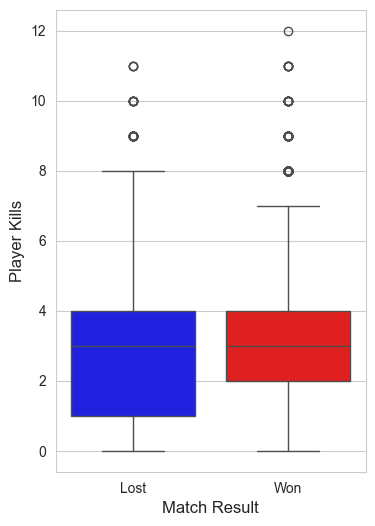

In [27]:
plt.figure(figsize=(4,6))

sns.boxplot(data=kills_vs_outcome_by_map,
               x = 'Won',
               y = 'Player Kills',
            hue='Won',
            palette=['blue', 'red'],
            legend=False)

plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.xlabel("Match Result", fontsize=12)
plt.ylabel("Player Kills", fontsize=12)

plt.show()

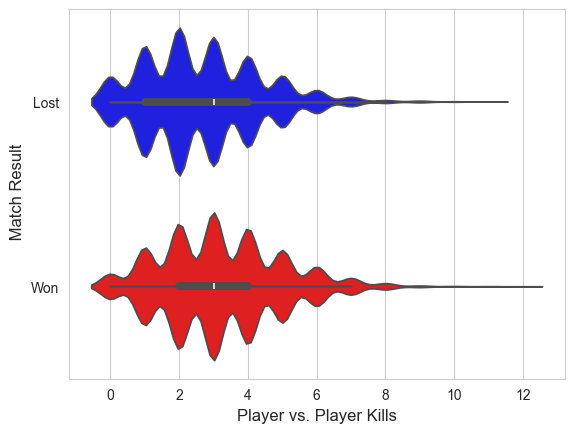

In [28]:
plt.figure()

sns.violinplot(data=kills_vs_outcome_by_map,
               y = 'Won',
               x = 'Player Kills',
            hue='Won',
            palette=['blue', 'red'],
            legend=False)


plt.xlabel("Player vs. Player Kills", fontsize=12)
plt.ylabel(" Match Result", fontsize=12)

plt.show()

In [29]:
team_kills_by_map = kills_vs_outcome_by_map.groupby(['Player Team','Map', "Match Name", "Won"])[['Player Kills', "Enemy Kills"]].sum().reset_index()
team_kills_by_map["Difference"] = team_kills_by_map["Player Kills"] - team_kills_by_map["Enemy Kills"]
team_kills_by_map["Won w/o Kills"] = np.where((team_kills_by_map["Won"] == "Won") & (team_kills_by_map["Difference"] <= 0), True, False)
team_kills_by_map["Lost w/ Kills"] = np.where((team_kills_by_map["Won"] == "Lost") & (team_kills_by_map["Difference"] >= 0), True, False)
team_kills_by_map.head(100)

,Player Team,Map,Match Name,Won,Player Kills,Enemy Kills,Difference,Won w/o Kills,Lost w/ Kills
0,100 Thieves,Fracture,100 Thieves vs FNATIC,Lost,32.0,67.0,-35.0,False,False
1,100 Thieves,Icebox,100 Thieves vs EDward Gaming,Won,80.0,84.0,-4.0,True,False
2,100 Thieves,Icebox,100 Thieves vs FNATIC,Lost,76.0,91.0,-15.0,False,False
3,100 Thieves,Lotus,100 Thieves vs EDward Gaming,Lost,71.0,81.0,-10.0,False,False
4,100 Thieves,Pearl,100 Thieves vs EDward Gaming,Won,102.0,87.0,15.0,False,False
...,...,...,...,...,...,...,...,...,...
95,DRX,Pearl,DRX vs T1,Won,78.0,69.0,9.0,False,False
96,DRX,Split,DRX vs FNATIC,Lost,51.0,80.0,-29.0,False,False
97,DRX,Split,DRX vs LOUD,Won,74.0,59.0,15.0,False,False
98,DRX,Split,DRX vs Team Secret,Won,76.0,54.0,22.0,False,False


<Figure size 640x480 with 0 Axes>

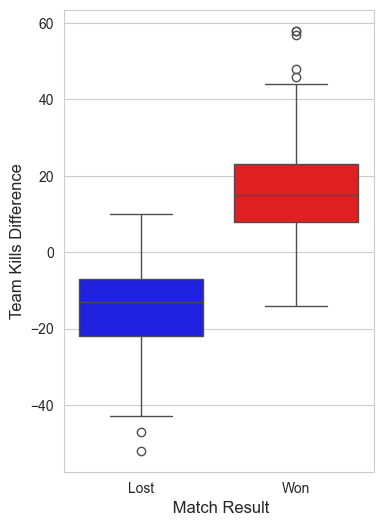

In [30]:
plt.figure()
plt.figure(figsize=(4,6))

sns.boxplot(data=team_kills_by_map,
               x = 'Won',
               y = 'Difference',
            hue='Won',
            palette=['blue', 'red'],
            legend=False)


plt.ylabel("Team Kills Difference", fontsize=12)
plt.xlabel(" Match Result", fontsize=12)

plt.show()

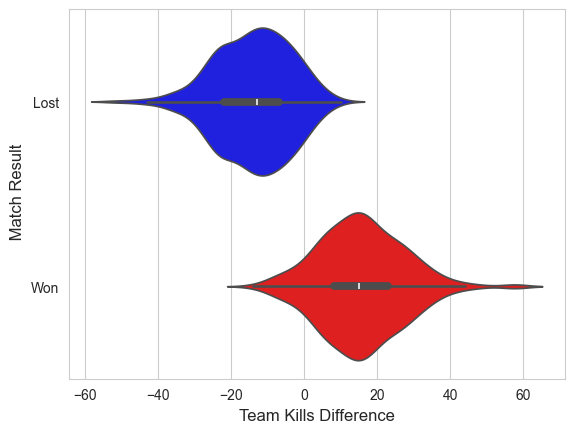

In [31]:
plt.figure()

sns.violinplot(data=team_kills_by_map,
               y = 'Won',
               x = 'Difference',
            hue='Won',
            palette=['blue', 'red'],
            legend=False)


plt.xlabel("Team Kills Difference", fontsize=12)
plt.ylabel(" Match Result", fontsize=12)

plt.show()

In [32]:
X = team_kills_by_map[["Difference"]]
y = team_kills_by_map["Won"] == "Won"
log_team_kills_diff = LogisticRegression()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1, shuffle=True)

In [33]:
log_team_kills_diff.fit(X_train, y_train)
pred = log_team_kills_diff.predict(X)
acc = accuracy_score(y, pred)

In [34]:
print(acc)

0.9203778677462888


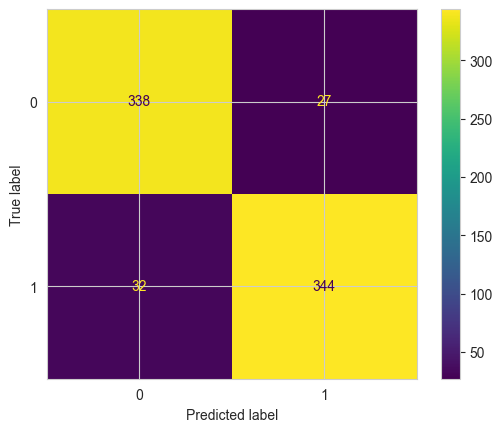

In [35]:
cm_log = confusion_matrix(y,pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm_log)
disp.plot()
plt.show()

In [36]:
len(team_kills_by_map[team_kills_by_map["Won w/o Kills"] == True])

32

In [37]:
len(team_kills_by_map[team_kills_by_map["Lost w/ Kills"] == True])

30

Kills by Round

In [38]:
rounds_kills = pd.read_csv("../data/vct_2023/matches/rounds_kills.csv")
rounds_kills.head(100)

,Tournament,Stage,Match Type,Match Name,Map,Round Number,Eliminator Team,Eliminator,Eliminator Agent,Eliminated Team,Eliminated,Eliminated Agent,Kill Type
0,Valorant Champions 2023,Group Stage,Opening (D),Team Liquid vs Natus Vincere,Fracture,Round 1,Team Liquid,soulcas,astra,Natus Vincere,cNed,killjoy,2k
1,Valorant Champions 2023,Group Stage,Opening (D),Team Liquid vs Natus Vincere,Fracture,Round 1,Team Liquid,soulcas,astra,Natus Vincere,Shao,fade,2k
2,Valorant Champions 2023,Group Stage,Opening (D),Team Liquid vs Natus Vincere,Fracture,Round 17,Team Liquid,soulcas,astra,Natus Vincere,ANGE1,omen,2k
3,Valorant Champions 2023,Group Stage,Opening (D),Team Liquid vs Natus Vincere,Fracture,Round 17,Team Liquid,soulcas,astra,Natus Vincere,Zyppan,raze,2k
4,Valorant Champions 2023,Group Stage,Opening (D),Team Liquid vs Natus Vincere,Fracture,Round 17,Team Liquid,soulcas,astra,Team Liquid,soulcas,astra,2k
...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,Valorant Champions 2023,Group Stage,Opening (D),Team Liquid vs Natus Vincere,Fracture,Round 6,Natus Vincere,SUYGETSU,viper,Team Liquid,Jamppi,neon,3k
96,Valorant Champions 2023,Group Stage,Opening (D),Team Liquid vs Natus Vincere,Fracture,Round 6,Natus Vincere,SUYGETSU,viper,Team Liquid,nAts,viper,3k
97,Valorant Champions 2023,Group Stage,Opening (D),Team Liquid vs Natus Vincere,Fracture,Round 6,Natus Vincere,SUYGETSU,viper,Team Liquid,Sayf,breach,3k
98,Valorant Champions 2023,Group Stage,Opening (D),Team Liquid vs Natus Vincere,Fracture,Round 7,Natus Vincere,SUYGETSU,viper,Team Liquid,nAts,viper,3k


In [86]:
left = rounds_kills
right = maps_scores[["Tournament", "Stage", "Match Type", "Match Name", "Map", "Match Result"]]
keys = ['Tournament', 'Stage', 'Match Type', 'Match Name', 'Map']
rounds_kills_vs_outcome = left.merge(right, left_on=keys, right_on=keys)
rounds_kills_vs_outcome.head(500)

,Tournament,Stage,Match Type,Match Name,Map,Round Number,Eliminator Team,Eliminator,Eliminator Agent,Eliminated Team,Eliminated,Eliminated Agent,Kill Type,Match Result
0,Valorant Champions 2023,Group Stage,Opening (D),Team Liquid vs Natus Vincere,Fracture,Round 1,Team Liquid,soulcas,astra,Natus Vincere,cNed,killjoy,2k,Natus Vincere
1,Valorant Champions 2023,Group Stage,Opening (D),Team Liquid vs Natus Vincere,Fracture,Round 1,Team Liquid,soulcas,astra,Natus Vincere,Shao,fade,2k,Natus Vincere
2,Valorant Champions 2023,Group Stage,Opening (D),Team Liquid vs Natus Vincere,Fracture,Round 17,Team Liquid,soulcas,astra,Natus Vincere,ANGE1,omen,2k,Natus Vincere
3,Valorant Champions 2023,Group Stage,Opening (D),Team Liquid vs Natus Vincere,Fracture,Round 17,Team Liquid,soulcas,astra,Natus Vincere,Zyppan,raze,2k,Natus Vincere
4,Valorant Champions 2023,Group Stage,Opening (D),Team Liquid vs Natus Vincere,Fracture,Round 17,Team Liquid,soulcas,astra,Team Liquid,soulcas,astra,2k,Natus Vincere
5,Valorant Champions 2023,Group Stage,Opening (D),Team Liquid vs Natus Vincere,Fracture,Round 18,Team Liquid,soulcas,astra,Natus Vincere,Zyppan,raze,2k,Natus Vincere
6,Valorant Champions 2023,Group Stage,Opening (D),Team Liquid vs Natus Vincere,Fracture,Round 18,Team Liquid,soulcas,astra,Natus Vincere,cNed,killjoy,2k,Natus Vincere
7,Valorant Champions 2023,Group Stage,Opening (D),Team Liquid vs Natus Vincere,Fracture,Round 14,Team Liquid,soulcas,astra,Natus Vincere,ANGE1,omen,3k,Natus Vincere
8,Valorant Champions 2023,Group Stage,Opening (D),Team Liquid vs Natus Vincere,Fracture,Round 14,Team Liquid,soulcas,astra,Natus Vincere,SUYGETSU,viper,3k,Natus Vincere
9,Valorant Champions 2023,Group Stage,Opening (D),Team Liquid vs Natus Vincere,Fracture,Round 14,Team Liquid,soulcas,astra,Natus Vincere,Zyppan,raze,3k,Natus Vincere


In [40]:
rounds_kills_vs_outcome["Won Match"] = np.where(rounds_kills_vs_outcome["Eliminator Team"] == rounds_kills_vs_outcome["Match Result"], "Win", "Loss")
rounds_kills_vs_outcome["Round Number"] = rounds_kills_vs_outcome['Round Number'].apply(lambda x: int(x[6:]))

In [41]:
rounds_kills_vs_outcome.sort_values(by=['Tournament', 'Stage', 'Match Type', 'Match Name', 'Map', 'Round Number'], inplace=True)
rounds_kills_vs_outcome.head(333)

,Tournament,Stage,Match Type,Match Name,Map,Round Number,Eliminator Team,Eliminator,Eliminator Agent,Eliminated Team,Eliminated,Eliminated Agent,Kill Type,Match Result,Won Match
10002,Champions Tour 2023: Americas Last Chance Qual...,Main Event,Grand Final,KRÜ Esports vs Leviatán,Ascent,1,Leviatán,Tacolilla,jett,KRÜ Esports,Klaus,sova,2k,KRÜ Esports,Loss
10003,Champions Tour 2023: Americas Last Chance Qual...,Main Event,Grand Final,KRÜ Esports vs Leviatán,Ascent,1,Leviatán,Tacolilla,jett,KRÜ Esports,DaveeyS,kayo,2k,KRÜ Esports,Loss
10004,Champions Tour 2023: Americas Last Chance Qual...,Main Event,Grand Final,KRÜ Esports vs Leviatán,Ascent,2,Leviatán,Tacolilla,jett,KRÜ Esports,Klaus,sova,2k,KRÜ Esports,Loss
10005,Champions Tour 2023: Americas Last Chance Qual...,Main Event,Grand Final,KRÜ Esports vs Leviatán,Ascent,2,Leviatán,Tacolilla,jett,KRÜ Esports,keznit,jett,2k,KRÜ Esports,Loss
9976,Champions Tour 2023: Americas Last Chance Qual...,Main Event,Grand Final,KRÜ Esports vs Leviatán,Ascent,3,KRÜ Esports,Klaus,sova,Leviatán,nzr,sova,2k,KRÜ Esports,Win
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9752,Champions Tour 2023: Americas Last Chance Qual...,Main Event,Lower Final,Cloud9 vs Leviatán,Bind,11,Cloud9,jakee,astra,Leviatán,nzr,raze,2k,Leviatán,Loss
9753,Champions Tour 2023: Americas Last Chance Qual...,Main Event,Lower Final,Cloud9 vs Leviatán,Bind,11,Cloud9,jakee,astra,Leviatán,Tacolilla,chamber,2k,Leviatán,Loss
9776,Champions Tour 2023: Americas Last Chance Qual...,Main Event,Lower Final,Cloud9 vs Leviatán,Bind,11,Leviatán,Mazino,harbor,Cloud9,Xeppaa,skye,2k,Leviatán,Win
9777,Champions Tour 2023: Americas Last Chance Qual...,Main Event,Lower Final,Cloud9 vs Leviatán,Bind,11,Leviatán,Mazino,harbor,Cloud9,jakee,astra,2k,Leviatán,Win


In [42]:
eco_rounds = pd.read_csv("../data/vct_2023/matches/eco_rounds.csv")
eco_rounds.rename(columns={'Outcome':'Won Round'}, inplace=True)
eco_rounds.rename(columns={'Team':'Eliminator Team'}, inplace=True)
eco_rounds.head()

,Tournament,Stage,Match Type,Match Name,Map,Round Number,Eliminator Team,Loadout Value,Remaining Credits,Type,Won Round
0,Valorant Champions 2023,Group Stage,Opening (D),Team Liquid vs Natus Vincere,Fracture,1,Team Liquid,3.6k,0.4k,Eco: 0-5k,Win
1,Valorant Champions 2023,Group Stage,Opening (D),Team Liquid vs Natus Vincere,Fracture,1,Natus Vincere,3.5k,0.3k,Eco: 0-5k,Loss
2,Valorant Champions 2023,Group Stage,Opening (D),Team Liquid vs Natus Vincere,Fracture,2,Team Liquid,15.6k,4.1k,Semi-buy: 10-20k,Win
3,Valorant Champions 2023,Group Stage,Opening (D),Team Liquid vs Natus Vincere,Fracture,2,Natus Vincere,4.2k,6.4k,Eco: 0-5k,Loss
4,Valorant Champions 2023,Group Stage,Opening (D),Team Liquid vs Natus Vincere,Fracture,3,Team Liquid,13.3k,14.8k,Semi-buy: 10-20k,Win


In [43]:
left = rounds_kills_vs_outcome
right = eco_rounds[["Tournament", "Stage", "Match Type", "Match Name", "Map", "Round Number", "Eliminator Team", "Won Round"]]
keys = ['Tournament', 'Stage', 'Match Type', 'Match Name', 'Map', 'Eliminator Team', 'Round Number']
rounds_kills_vs_outcome = left.merge(right, left_on=keys, right_on=keys)

In [44]:
team_rounds_kills = rounds_kills_vs_outcome.groupby(["Tournament", "Stage", "Match Type","Match Name", "Eliminator Team", "Map", "Round Number", "Won Round", "Won Match"])[['Eliminator']].count().reset_index()

In [92]:
team_rounds_kills = team_rounds_kills.rename(columns={"Eliminator":"Total_special_kills"})
team_rounds_kills = team_rounds_kills.rename(columns={"Round Number":"Round_Number"})
rounds_kills_vs_outcome = rounds_kills_vs_outcome.rename(columns={"Round Number":"Round_Number"})

In [93]:
rounds_kills_vs_outcome.sort_values(by=['Round_Number'])
rounds_kills_vs_outcome.head(500)

,Tournament,Stage,Match Type,Match Name,Map,Round_Number,Eliminator Team,Eliminator,Eliminator Agent,Eliminated Team,Eliminated,Eliminated Agent,Kill Type,Match Result
0,Valorant Champions 2023,Group Stage,Opening (D),Team Liquid vs Natus Vincere,Fracture,Round 1,Team Liquid,soulcas,astra,Natus Vincere,cNed,killjoy,2k,Natus Vincere
1,Valorant Champions 2023,Group Stage,Opening (D),Team Liquid vs Natus Vincere,Fracture,Round 1,Team Liquid,soulcas,astra,Natus Vincere,Shao,fade,2k,Natus Vincere
2,Valorant Champions 2023,Group Stage,Opening (D),Team Liquid vs Natus Vincere,Fracture,Round 17,Team Liquid,soulcas,astra,Natus Vincere,ANGE1,omen,2k,Natus Vincere
3,Valorant Champions 2023,Group Stage,Opening (D),Team Liquid vs Natus Vincere,Fracture,Round 17,Team Liquid,soulcas,astra,Natus Vincere,Zyppan,raze,2k,Natus Vincere
4,Valorant Champions 2023,Group Stage,Opening (D),Team Liquid vs Natus Vincere,Fracture,Round 17,Team Liquid,soulcas,astra,Team Liquid,soulcas,astra,2k,Natus Vincere
5,Valorant Champions 2023,Group Stage,Opening (D),Team Liquid vs Natus Vincere,Fracture,Round 18,Team Liquid,soulcas,astra,Natus Vincere,Zyppan,raze,2k,Natus Vincere
6,Valorant Champions 2023,Group Stage,Opening (D),Team Liquid vs Natus Vincere,Fracture,Round 18,Team Liquid,soulcas,astra,Natus Vincere,cNed,killjoy,2k,Natus Vincere
7,Valorant Champions 2023,Group Stage,Opening (D),Team Liquid vs Natus Vincere,Fracture,Round 14,Team Liquid,soulcas,astra,Natus Vincere,ANGE1,omen,3k,Natus Vincere
8,Valorant Champions 2023,Group Stage,Opening (D),Team Liquid vs Natus Vincere,Fracture,Round 14,Team Liquid,soulcas,astra,Natus Vincere,SUYGETSU,viper,3k,Natus Vincere
9,Valorant Champions 2023,Group Stage,Opening (D),Team Liquid vs Natus Vincere,Fracture,Round 14,Team Liquid,soulcas,astra,Natus Vincere,Zyppan,raze,3k,Natus Vincere


In [49]:
team_rounds_kills.head(777)

,Tournament,Stage,Match Type,Match Name,Eliminator Team,Map,Round_Number,Won Round,Won Match,Total_special_kills
0,Champions Tour 2023: Americas Last Chance Qual...,Main Event,Grand Final,KRÜ Esports vs Leviatán,KRÜ Esports,Ascent,3,Win,Win,4
1,Champions Tour 2023: Americas Last Chance Qual...,Main Event,Grand Final,KRÜ Esports vs Leviatán,KRÜ Esports,Ascent,4,Win,Win,2
2,Champions Tour 2023: Americas Last Chance Qual...,Main Event,Grand Final,KRÜ Esports vs Leviatán,KRÜ Esports,Ascent,5,Loss,Win,2
3,Champions Tour 2023: Americas Last Chance Qual...,Main Event,Grand Final,KRÜ Esports vs Leviatán,KRÜ Esports,Ascent,6,Loss,Win,3
4,Champions Tour 2023: Americas Last Chance Qual...,Main Event,Grand Final,KRÜ Esports vs Leviatán,KRÜ Esports,Ascent,7,Win,Win,3
...,...,...,...,...,...,...,...,...,...,...
772,Champions Tour 2023: Americas League,Playoffs,Grand Final,LOUD vs NRG Esports,NRG Esports,Ascent,7,Win,Loss,4
773,Champions Tour 2023: Americas League,Playoffs,Grand Final,LOUD vs NRG Esports,NRG Esports,Ascent,8,Loss,Loss,2
774,Champions Tour 2023: Americas League,Playoffs,Grand Final,LOUD vs NRG Esports,NRG Esports,Ascent,9,Win,Loss,5
775,Champions Tour 2023: Americas League,Playoffs,Grand Final,LOUD vs NRG Esports,NRG Esports,Ascent,10,Win,Loss,3


Special Kills Rating

In [61]:
rounds = rounds_kills_vs_outcome[["Tournament", "Stage", "Match Type", "Match Name", "Eliminator Team", "Map","Won Match"]].drop_duplicates()

In [62]:
rounds.head()

,Tournament,Stage,Match Type,Match Name,Eliminator Team,Map,Won Match
0,Champions Tour 2023: Americas Last Chance Qual...,Main Event,Grand Final,KRÜ Esports vs Leviatán,Leviatán,Ascent,Loss
4,Champions Tour 2023: Americas Last Chance Qual...,Main Event,Grand Final,KRÜ Esports vs Leviatán,KRÜ Esports,Ascent,Win
81,Champions Tour 2023: Americas Last Chance Qual...,Main Event,Grand Final,KRÜ Esports vs Leviatán,Leviatán,Lotus,Loss
83,Champions Tour 2023: Americas Last Chance Qual...,Main Event,Grand Final,KRÜ Esports vs Leviatán,KRÜ Esports,Lotus,Win
158,Champions Tour 2023: Americas Last Chance Qual...,Main Event,Grand Final,KRÜ Esports vs Leviatán,Leviatán,Pearl,Win


In [63]:
rounds = rounds.assign(Round_Number = [[i for i in range(1,25)]]*len(rounds)).explode("Round_Number")

In [87]:
rounds.reset_index(drop = True, inplace = True)
rounds.head()

,Tournament,Stage,Match Type,Match Name,Eliminator Team,Map,Won Match,Round_Number
0,Champions Tour 2023: Americas Last Chance Qual...,Main Event,Grand Final,KRÜ Esports vs Leviatán,Leviatán,Ascent,Loss,1
1,Champions Tour 2023: Americas Last Chance Qual...,Main Event,Grand Final,KRÜ Esports vs Leviatán,Leviatán,Ascent,Loss,2
2,Champions Tour 2023: Americas Last Chance Qual...,Main Event,Grand Final,KRÜ Esports vs Leviatán,Leviatán,Ascent,Loss,3
3,Champions Tour 2023: Americas Last Chance Qual...,Main Event,Grand Final,KRÜ Esports vs Leviatán,Leviatán,Ascent,Loss,4
4,Champions Tour 2023: Americas Last Chance Qual...,Main Event,Grand Final,KRÜ Esports vs Leviatán,Leviatán,Ascent,Loss,5


In [88]:
special_kills_all_rounds = pd.merge(team_rounds_kills, rounds, how='outer', on=["Tournament", "Stage", "Match Type", "Match Name", "Eliminator Team", "Map", "Round_Number", "Won Match"])

In [89]:
special_kills_all_rounds["Total_special_kills"] = special_kills_all_rounds["Total_special_kills"].fillna(0)

In [90]:
special_kills_all_rounds.head()

,Tournament,Stage,Match Type,Match Name,Eliminator Team,Map,Round_Number,Won Round,Won Match,Total_special_kills
0,Champions Tour 2023: Americas Last Chance Qual...,Main Event,Grand Final,KRÜ Esports vs Leviatán,KRÜ Esports,Ascent,1,NaN,Win,0.0
1,Champions Tour 2023: Americas Last Chance Qual...,Main Event,Grand Final,KRÜ Esports vs Leviatán,KRÜ Esports,Ascent,2,NaN,Win,0.0
2,Champions Tour 2023: Americas Last Chance Qual...,Main Event,Grand Final,KRÜ Esports vs Leviatán,KRÜ Esports,Ascent,3,Win,Win,4.0
3,Champions Tour 2023: Americas Last Chance Qual...,Main Event,Grand Final,KRÜ Esports vs Leviatán,KRÜ Esports,Ascent,4,Win,Win,2.0
4,Champions Tour 2023: Americas Last Chance Qual...,Main Event,Grand Final,KRÜ Esports vs Leviatán,KRÜ Esports,Ascent,5,Loss,Win,2.0
